# ConvertCamperDataset

## Import

In [43]:
import os
import cv2
import numpy as np
import json
import pandas
import matplotlib.pyplot as plt

## Config

In [44]:
CONFIG = {
    'PATH_ROOT' : '/opt/ml/input/data/camper-dataset/',
    'NAME_ANNOTATION' : 'annotation.json', 
    'NAME_ANNOTATION_RESULT' : 'ufo/train.json',
}

In [45]:
path_annotation = os.path.join(CONFIG['PATH_ROOT'], CONFIG['NAME_ANNOTATION'])
path_annotation_result = os.path.join(CONFIG['PATH_ROOT'], CONFIG['NAME_ANNOTATION_RESULT'])

## Load Json

In [46]:
with open(path_annotation) as json_file:
  file_contents = json_file.read()
annotation_json = json.loads(file_contents)

## Convert

In [47]:
for img_name in annotation_json['images']:
    for bbox_name in annotation_json['images'][img_name]['words']:
        points = annotation_json['images'][img_name]['words'][bbox_name]['points']
        if len(points) > 4:
            m = np.array(points, np.float32)
            p = cv2.boxPoints(cv2.minAreaRect(m)).tolist()
            annotation_json['images'][img_name]['words'][bbox_name]['points'] = p
  

## Save

In [48]:
os.makedirs(os.path.join(CONFIG['PATH_ROOT'], 'ufo'), exist_ok=True)
with open(path_annotation_result, "w") as json_file:
  json.dump(annotation_json, json_file)

## Verify

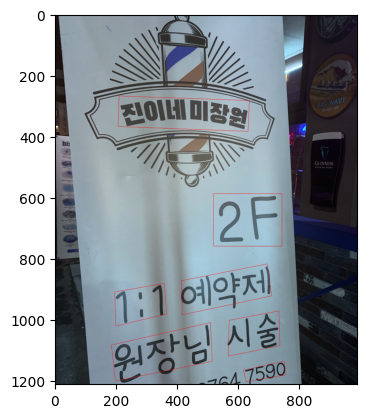

In [88]:
img_name = sorted(annotation_json['images'].keys())[1]
img_dict = annotation_json['images'][img_name]
img = cv2.imread(os.path.join(CONFIG['PATH_ROOT'], 'images/', img_name))
for name in img_dict['words']:
    points = img_dict['words'][name]['points']
    points = np.array(points,np.int32)
    cv2.drawContours(img, [points],0,(255,0,0))
plt.imshow(img)